In [1]:
import turicreate

In [2]:
people = turicreate.SFrame('people_wiki.sframe')

In [5]:
people.tail()

URI,name,text
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...
<http://dbpedia.org/resource/Scott_Baker_(judge)> ...,Scott Baker (judge),sir thomas scottgillespie baker born 10 ...
<http://dbpedia.org/resource/Dragoljub_Ojdani% ...,Dragoljub Ojdani%C4%87,dragoljub ojdani serbiancyrillic born june 1 ...
<http://dbpedia.org/resource/Oz_Bengur> ...,Oz Bengur,osman oz bengur bornfebruary 23 1949 is an ...
<http://dbpedia.org/resource/Dee_Brown_(basket ...,"Dee Brown (basketball,born 1968) ...",decovan kadell dee brownborn november 29 1968 is ...
<http://dbpedia.org/resource/Olari_Elts> ...,Olari Elts,olari elts born april 271971 in tallinn estonia ...
<http://dbpedia.org/resource/Scott_F._Crago> ...,Scott F. Crago,scott francis crago bornjuly 26 1963 twin bro ...
<http://dbpedia.org/resource/David_Cass_(footb ...,David Cass (footballer),david william royce cassborn 27 march 1962 in ...
<http://dbpedia.org/resource/Keith_Elias> ...,Keith Elias,keith hector elias bornfebruary 3 1972 in lacey ...
<http://dbpedia.org/resource/Fawaz_Damrah> ...,Fawaz Damrah,fawaz mohammed damraharabic fawwz damra was ...


In [6]:
len(people['name'])

59071

In [7]:
Rod = people[people['name']=='Rod Wilt']

In [10]:
Rod['text']

dtype: str
Rows: ?
['rod wilt is a former republican member of the pennsylvania house of representativeshe is a 1982 graduate of greenville high school he graduated from thiel college in 1986 where he was an ncaa division iii wrestling allamerican and an academic allamerican he was inducted into the thiel college athletic hall of fame in october 1996 wilt worked as director of real estate acquisitions for the hudson real estate group in hermitage pennsylvania and as product manager in sales and marketing for winner international corporation in sharon pennsylvania he has also worked as assistant vice president at first national bank of pennsylvania and as vice president of the mortgage service corporation of hermitage pennsylvaniawilt was first elected to represent the 17th legislative district in the pennsylvania house of representatives in 1996 with his victory rod became the third generation of state representatives in the wilt family his grandfather ray wilt represented the 29th leg

In [17]:
Rod['counts'] = turicreate.text_analytics.count_words(Rod['text'])

In [20]:
Rod.stack('counts', new_column_name=['word','count'])

URI,name,text,word,count
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,on,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,take,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,brooks,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,michele,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,commissioner,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,picked,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,place,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,party,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,seek,1.0
<http://dbpedia.org/resource/Rod_Wilt> ...,Rod Wilt,rod wilt is a formerrepublican member of the ...,decision,1.0


In [23]:
c_table = Rod[['counts']].stack('counts',new_column_name=['word','count'])

In [24]:
c_table

word,count
on,1.0
take,1.0
brooks,1.0
michele,1.0
commissioner,1.0
picked,1.0
place,1.0
party,1.0
seek,1.0
decision,1.0


In [29]:
c_table.sort('count',ascending=False)

word,count
the,16.0
in,12.0
of,10.0
his,7.0
and,7.0
wilt,6.0
to,6.0
pennsylvania,6.0
from,5.0
he,5.0


In [30]:
people['word_count'] = turicreate.text_analytics.count_words(people['text'])

In [31]:
people

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne': 1.0,'parade': 1.0, ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time': 1.0, 'each':1.0, 'hour': 1.0, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society': 1.0,'hamilton': 1.0, 'to': ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis': 1.0,'awarded': 1.0, '2004': ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis': 1.0, '2007':1.0, 'cent': 1.0, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses': 1.0, 'sic':1.0, 'toilets': 1.0, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz': 1.0,'including': 1.0, ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia': 1.0,'creative': 1.0, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies': 1.0, 'new':1.0, 'brand': 1.0, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002': 1.0, 'harvard':1.0, 'twentieth': 1.0, ..."


In [38]:
people['tfidf'] = turicreate.text_analytics.tf_idf(people['text'])

In [39]:
type(people['word_count'])

turicreate.data_structures.sarray.SArray

In [40]:
people

URI,name,text,word_count
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...,"{'melbourne': 1.0,'parade': 1.0, ..."
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...,"{'time': 1.0, 'each':1.0, 'hour': 1.0, ..."
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...,"{'society': 1.0,'hamilton': 1.0, 'to': ..."
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...,"{'kurdlawitzpreis': 1.0,'awarded': 1.0, '2004': ..."
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...,"{'curtis': 1.0, '2007':1.0, 'cent': 1.0, ..."
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...,"{'asses': 1.0, 'sic':1.0, 'toilets': 1.0, ..."
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...,"{'streamz': 1.0,'including': 1.0, ..."
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...,"{'concordia': 1.0,'creative': 1.0, ..."
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...,"{'heavies': 1.0, 'new':1.0, 'brand': 1.0, ..."
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...,"{'2002': 1.0, 'harvard':1.0, 'twentieth': 1.0, ..."


In [41]:
people[['word_count']].stack('word_count',new_column_name=['w','c']).sort('c',ascending=False)

w,c
the,442.0
the,246.0
in,245.0
the,210.0
of,209.0
of,174.0
the,173.0
de,165.0
and,164.0
the,151.0


In [46]:
obama = people[people['name'] == 'Barack Obama']

In [47]:
obama

Columns:
	URI	str
	name	str
	text	str
	word_count	dict
	tfidf	dict

Rows: Unknown

Data:
+-------------------------------+--------------+-------------------------------+
|              URI              |     name     |              text             |
+-------------------------------+--------------+-------------------------------+
| <http://dbpedia.org/resour... | Barack Obama | barack hussein obama ii br... |
+-------------------------------+--------------+-------------------------------+
+-------------------------------+-------------------------------+
|           word_count          |             tfidf             |
+-------------------------------+-------------------------------+
| {'normalize': 1.0, 'sought... | {'normalize': 10.293348208... |
+-------------------------------+-------------------------------+
[? rows x 5 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [48]:
table = people[['word_count']].stack('word_count', new_column_name=['w','c']).sort('c',ascending=False)

In [49]:
table

w,c
the,442.0
the,246.0
in,245.0
the,210.0
of,209.0
of,174.0
the,173.0
de,165.0
and,164.0
the,151.0


In [50]:
ob = obama[['word_count']].stack('word_count', new_column_name=['w','c']).sort('c',ascending=False)

In [51]:
ob

w,c
the,40.0
in,30.0
and,21.0
of,18.0
to,14.0
his,11.0
obama,9.0
act,8.0
a,7.0
he,7.0


In [57]:
ob2 = obama[['tfidf']].stack('tfidf', new_column_name=['w','c'])

In [61]:
import matplotlib.pyplot as plt

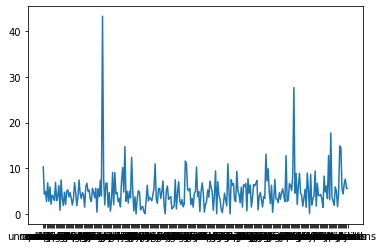

In [62]:
plt.plot(ob2['w'].sort(),ob2['c'])

In [63]:
knn_model = turicreate.nearest_neighbors.create(people,features=['tfidf'],label='name')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [66]:
knn_model.query(obama,k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.347ms     |

| Done         |         | 100         | 446.092ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Barack Obama,0.0,1
0,Joe Biden,0.7941176470588236,2
0,Joe Lieberman,0.7946859903381642,3
0,Kelly Ayotte,0.8119891008174387,4
0,Bill Clinton,0.8138528138528138,5
0,Artur Davis,0.8172323759791122,6
0,George W. Bush,0.8189473684210526,7
0,John Kerry,0.819477434679335,8
0,Sam Brownback,0.8211382113821138,9
0,Richard Cordray,0.8218085106382979,10
